<h1 style="font-size:32px;font-weight:400">Financial Time Series from Scratch with Python</h1>
<h3 style="font-size:18px;font-weight:400">Joseph Vanderselt, CFA, CPA</h3>
<a href="mailto: josephva@uchicago.edu">josephva@uchicago.edu</a> | 
<a href="https://www.linkedin.com/in/joe-vanderstelt-cfa-cpa-48172925/">LinkedIn</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})

In [9]:
def get_mock_time_series():
    
    ts = pd.DataFrame(
        [
            {"time": 1, "return": 8},
            {"time": 2, "return": 10},
            {"time": 3, "return": 10.5},
            {"time": 4, "return": 12},
            {"time": 5, "return": 12}
        ]
    ).set_index("time")

    ts["forecast"] = np.nan
    ts["error"] = np.nan
    
    return ts

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id="ar">Autoregressive ("AR")</h2>
<br>
TBD

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id="ma">Moving average ("MA")</h2>
<br>
<div style="color:#0000B3;font-size:16px;font-weight:200">Model Form</div>
$
\;\;\;\;\;\;
f{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1}\dots+\theta_{q}\epsilon_{t-q}
$

<div style="color:#0000B3;font-size:16px;font-weight:200">MA(1)</div>
<br>
$
\;\;\;\;\;\;
f(t) = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1}
$

<p>Using some MA(1) model, let's see how it performs on following data.</p>

In [10]:
ts = get_mock_time_series()
ts.T

time,1,2,3,4,5
return,8.0,10.0,10.5,12.0,12.0
forecast,NaN,NaN,NaN,NaN,NaN
error,NaN,NaN,NaN,NaN,NaN


<p>We are given the following parameters, which have been generated by using some historical data.</p>

In [11]:
mean = 10
theta = 0.5

<div style="color:#0000B3;font-size:16px;font-weight:200">t=1</div>

In [12]:
t = 1
ts["forecast"][t] = mean
ts["error"][t] = ts["return"][t]-ts["forecast"][t]
ts.T

time,1,2,3,4,5
return,8.0,10.0,10.5,12.0,12.0
forecast,10.0,NaN,NaN,NaN,NaN
error,-2.0,NaN,NaN,NaN,NaN


<div style="color:#0000B3;font-size:16px;font-weight:200">t = 2, t = 3, ..., t = 5</div>

In [6]:
for t in range(2,(ts.shape[0]+1)):
    ts["forecast"][t] = mean + ts["error"][t-1]*theta
    ts["error"][t] = ts["return"][t]-ts["forecast"][t]
ts.T

time,1,2,3,4,5
return,8.0,10.0,10.5,12.0,12.0
forecast,10.0,9.0,10.5,10.0,11.0
error,-2.0,1.0,0.0,2.0,1.0


In [7]:
def plot_ts(
    ts
):
    f = plt.figure(figsize=(10,4))
    plt.scatter(ts.index,ts["return"])
    plt.plot(ts.index,ts["forecast"],linestyle="--")
    plt.xlabel("Time (t)")
    plt.ylabel("Return (r)")
    plt.title("MA(1) Forecast vs. Actual",loc="left")
    plt.locator_params(nbins=ts.shape[0])
    plt.show()

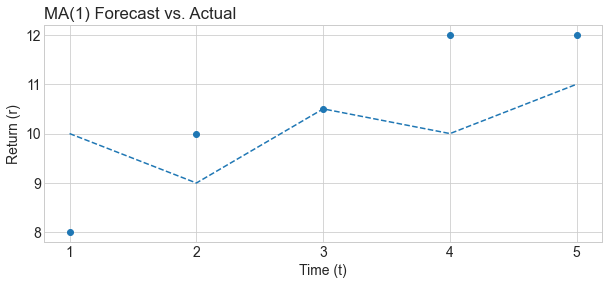

In [8]:
plot_ts(ts = ts)

<div style="color:#0000B3;font-size:16px;font-weight:200">Maximum Likelihood Estimation</div>

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id = "arma">Autoregressive moving average ("ARMA")</h2>
<br>
TBD

<h1 style="font-size:36px;font-weight:400">Unit-root stationary</h1>

In [9]:
import random
ts = [100]
for r in [random.randrange(0, 11, 1)-5 for _ in range(252)]:
    ts.append(ts[-1]*(1+r/100))

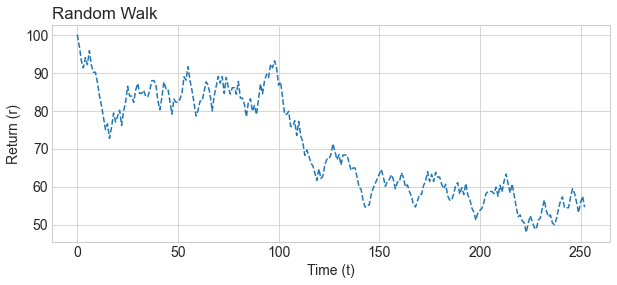

In [10]:
f = plt.figure(figsize=(10,4))
plt.plot(ts,linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Return (r)")
plt.title("Random Walk",loc="left")
plt.show()

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id = "rw">Random walk</h2>
Equivalent to an AR(1) model with $\phi_{1}$ = 1

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id = "rwd">Random walk with drift</h2>

In [11]:
drift = 0.0025
sigma = 0.012
logP0 = 5.1875

In [12]:
def rw_drift(t):
    return logP0 + drift*t, (sigma**2)*t

In [13]:
rw_drift(1)

(5.19, 0.000144)

In [14]:
rw_drift(10)

(5.2125, 0.00144)

In [15]:
rw_drift(100)

(5.4375, 0.0144)

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id = "differencing">Differencing</h2>

In [16]:
dts = np.diff(np.log(ts))

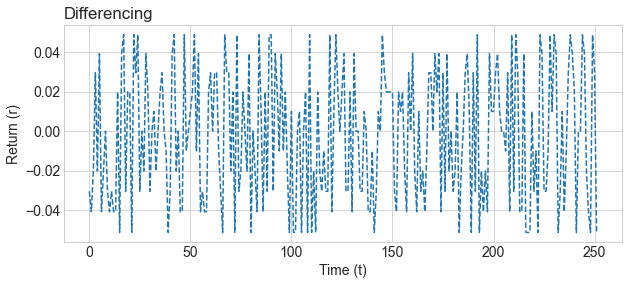

In [17]:
f = plt.figure(figsize=(10,4))
plt.plot(dts,linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Return (r)")
plt.title("Differencing",loc="left")
plt.show()

<div style="color:#0000B3;font-size:16px;font-weight:200">Unit-root test</div>

In [18]:
import statsmodels.api as sm

In [19]:
Y = dts[:-1]
X = sm.add_constant(dts[1:])

In [20]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([-0.00229261, -0.03743966])

<h2 style="color:#0000B3;font-size:32px;font-weight:400" id = "es">Exponential smoothing</h2>

0.12740228916146715

0.00333
0.00352314


In [62]:
# GARCH (return)
mu = 0.007708
ar1 = 0.032
ar2 = -0.030
ar3 = -0.011

# GARCH (not significant)
omega = 0.0000798
beta1 = 0.853
alpha1 = 0.124

# unconditional variance
uv = (omega / (1-alpha1-beta1))
uv

0.0034695652173913016

In [ ]:
# GARCH (significant)
mu = 0.00745
omega = 0.00008061
beta1 = 0.8544
alpha1 = 0.122

In [47]:
# Predict
omega + beta1*cv + alpha1*uv

0.0076282

0.00704628